In [1]:
import numpy as np
import scipy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
data = pd.read_csv('Codes/closeprice.csv', index_col=0)
data.index.name = None

In [3]:
data.shape

(2481, 63)

In [4]:
# remove columns with number of NaN greater than 0.3%
data = data.loc[:, data.isnull().mean() < .003]

In [5]:
data.shape

(2481, 52)

In [6]:
# price change
price = pd.DataFrame()
dt = 1
for name in data.columns:
    price[name] = [np.log(data[name][t+dt]) - np.log(data[name][t]) for t in range(len(data)-dt)]

In [7]:
price.shape

(2480, 52)

In [8]:
price.describe()

,RELIANCE,TCS,HINDUNILVR,HDFCBANK,HDFC,INFY,KOTAKBANK,BHARTIARTL,ITC,ICICIBANK,...,M&M,JSWSTEEL,MCDOWELL-N,GAIL,CIPLA,COLPAL,DLF,TORNTPHARM,PGHH,BIOCON
count,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,...,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000
mean,0.000138,0.000426,0.000800,-0.000118,-0.000042,-0.000514,0.000289,0.000136,-0.000026,-0.000198,...,-0.000304,-0.000537,-0.000318,-0.000497,0.000140,0.000305,-0.000184,0.000627,0.000764,0.000020
std,0.021562,0.021075,0.014404,0.037458,0.035647,0.029436,0.025395,0.019985,0.021960,0.037860,...,0.026566,0.051987,0.040934,0.024445,0.015558,0.019956,0.029772,0.022206,0.014282,0.033106
min,-0.698754,-0.702295,-0.055373,-1.605457,-1.577693,-0.715617,-0.701176,-0.098894,-0.706017,-1.600062,...,-0.731055,-2.311165,-1.629624,-0.719645,-0.092396,-0.717079,-0.336268,-0.682535,-0.057333,-1.084348
25%,-0.009819,-0.008012,-0.007532,-0.006561,-0.009204,-0.007488,-0.008614,-0.011457,-0.007838,-0.011186,...,-0.010218,-0.012817,-0.013210,-0.009943,-0.008581,-0.007456,-0.015938,-0.009248,-0.006939,-0.010035
50%,0.000050,0.000400,0.000179,0.000420,0.000217,0.000507,0.000818,-0.000424,0.000413,-0.000423,...,0.000420,0.000295,-0.000254,-0.000134,-0.000517,-0.000110,0.000692,0.000342,-0.000070,0.000000
75%,0.010288,0.009287,0.008519,0.007774,0.010443,0.009367,0.009963,0.010832,0.008859,0.011470,...,0.010442,0.013963,0.012455,0.009992,0.008533,0.007442,0.016726,0.010006,0.006946,0.010505
max,0.104027,0.115206,0.160264,0.085724,0.079781,0.155165,0.084269,0.099625,0.095725,0.137042,...,0.091223,0.114350,0.298074,0.094910,0.073474,0.084832,0.168736,0.095101,0.139162,0.144727


In [9]:
# normalized return
nprice = pd.DataFrame()
for name in price.columns:
    nprice[name] = [(price[name][t] - np.mean(price[name]))/np.std(price[name], ddof=1) for t in range(len(price))]

In [10]:
nprice.shape

(2480, 52)

In [11]:
nprice.describe()

,RELIANCE,TCS,HINDUNILVR,HDFCBANK,HDFC,INFY,KOTAKBANK,BHARTIARTL,ITC,ICICIBANK,...,M&M,JSWSTEEL,MCDOWELL-N,GAIL,CIPLA,COLPAL,DLF,TORNTPHARM,PGHH,BIOCON
count,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,...,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03,2.480000e+03
mean,-1.719055e-17,5.730183e-18,-3.223228e-17,6.446456e-18,1.432546e-17,1.217664e-17,-3.581365e-18,2.399514e-17,2.865092e-18,2.865092e-18,...,5.730183e-18,7.162729e-19,-4.297638e-18,-2.865092e-18,5.730183e-18,1.289291e-17,5.730183e-18,7.162729e-19,2.148819e-17,-2.865092e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.241243e+01,-3.334404e+01,-3.899691e+00,-4.285668e+01,-4.425768e+01,-2.429311e+01,-2.762203e+01,-4.955287e+00,-3.214911e+01,-4.225712e+01,...,-2.750717e+01,-4.444611e+01,-3.980328e+01,-2.941915e+01,-5.948028e+00,-3.594844e+01,-1.128867e+01,-3.076423e+01,-4.067972e+00,-3.275481e+01
25%,-4.617636e-01,-4.003681e-01,-5.784214e-01,-1.720032e-01,-2.570269e-01,-2.369387e-01,-3.505874e-01,-5.801034e-01,-3.557490e-01,-2.902309e-01,...,-3.731815e-01,-2.362189e-01,-3.149612e-01,-3.864100e-01,-5.605771e-01,-3.889082e-01,-5.291515e-01,-4.446788e-01,-5.393627e-01,-3.037230e-01
50%,-4.055057e-03,-1.230152e-03,-4.306846e-02,1.437933e-02,7.240876e-03,3.466480e-02,2.083688e-02,-2.801880e-02,1.999777e-02,-5.966520e-03,...,2.725647e-02,1.599970e-02,1.562848e-03,1.482672e-02,-4.224574e-02,-2.077953e-02,2.943893e-02,-1.281485e-02,-5.844106e-02,-6.101362e-04
75%,4.707117e-01,4.204587e-01,5.358855e-01,2.106949e-01,2.941178e-01,3.356434e-01,3.809624e-01,5.351964e-01,4.045921e-01,3.081639e-01,...,4.044995e-01,2.789198e-01,3.120327e-01,4.290755e-01,5.394728e-01,3.576284e-01,5.679899e-01,4.223645e-01,4.328334e-01,3.167189e-01
max,4.818058e+00,5.446310e+00,1.107053e+01,2.291672e+00,2.239252e+00,5.288632e+00,3.306928e+00,4.978250e+00,4.360284e+00,3.624911e+00,...,3.445290e+00,2.209901e+00,7.289592e+00,3.902922e+00,4.713694e+00,4.235683e+00,5.673832e+00,4.254354e+00,9.690503e+00,4.371055e+00


In [12]:
# correlation matrix
C = nprice.corr()

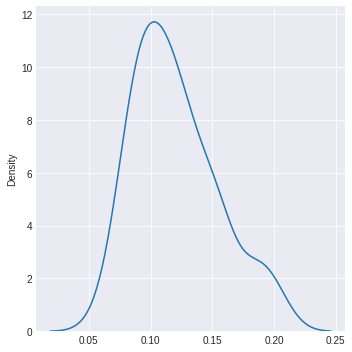

In [13]:
import seaborn as sns
sns.displot(np.mean(C), kind="kde")

In [14]:
# eigenvalues and eigenvectors calculation for elements in correlation matrix
eigvals, eigvecs = la.eig(C.to_numpy())
eigvals = eigvals.real

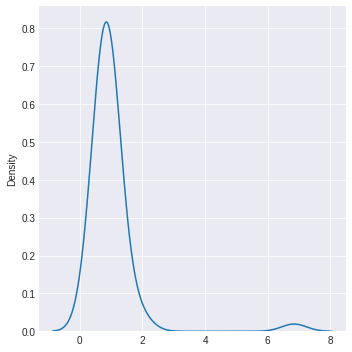

In [15]:
import seaborn as sns
sns.displot(eigvals, kind="kde")

In [16]:
columns = [f'column_{num}' for num in range(nprice.shape[1])]
index = [f'index_{num}' for num in range(nprice.shape[0])]
A = pd.DataFrame(np.random.normal(loc = 0, scale = 1, size = nprice.shape), columns = columns, index = index)

In [17]:
# N x N random matrix whose elements are all uncorrelated
R = A.corr()

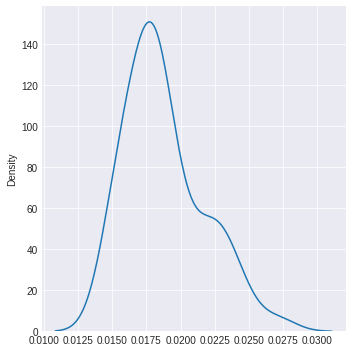

In [18]:
sns.displot(np.mean(R), kind="kde")

In [19]:
reigvals, reigvecs = la.eig(R.to_numpy())
reigvals = reigvals.real

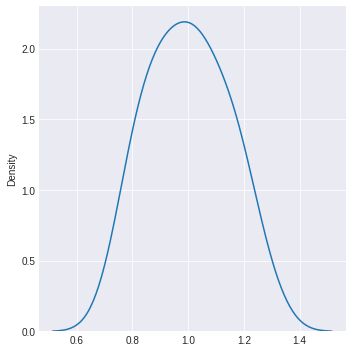

In [20]:
sns.displot(reigvals, kind="kde")

In [21]:
eigdata = pd.DataFrame()
eigdata['eigvals'] = eigvals
eigdata['reigvals'] = reigvals

In [22]:
eigdata.head()

,eigvals,reigvals
0,6.841963,1.314460
1,1.983730,0.714974
2,1.798420,1.266285
3,1.524316,0.753403
4,0.331767,1.238009


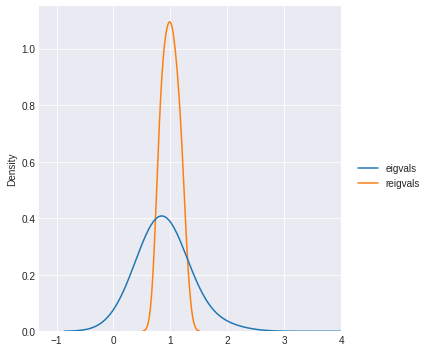

In [24]:
ax = sns.displot(eigdata, kind="kde")
ax.set(xlim=(None, 4))